In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

## IMOEX

In [ ]:
df = pd.read_csv('researches/data/IMOEX_2009-01-01_2024-04-08.csv')
df

,DATE,OPEN
0,2009-01-11,619.53
1,2009-01-12,635.40
2,2009-01-13,653.28
3,2009-01-14,655.16
4,2009-01-15,610.36
...,...,...
3815,2024-04-01,3343.66
3816,2024-04-02,3369.32
3817,2024-04-03,3381.95
3818,2024-04-04,3399.81


In [ ]:
df = df[df.DATE<='2024-04-04']

In [ ]:
df

,DATE,OPEN
0,2009-01-11,619.53
1,2009-01-12,635.40
2,2009-01-13,653.28
3,2009-01-14,655.16
4,2009-01-15,610.36
...,...,...
3814,2024-03-29,3313.17
3815,2024-04-01,3343.66
3816,2024-04-02,3369.32
3817,2024-04-03,3381.95


In [ ]:
df = df.rename(columns=lambda x: x.lower())

date_range = pd.date_range(start=df.date[0], end=df.date[df.date.size-1], freq='D')
df_full_dates = pd.DataFrame(date_range, columns=['date'])

df['date'] = pd.to_datetime(df['date'])
df = pd.merge(df_full_dates, df, how='left', on='date')

In [ ]:
df.isna().sum()

date       0
open    1744
dtype: int64

In [ ]:
df.open = df.open.fillna(df.open.rolling(window = 3,min_periods = 1).mean())

In [ ]:
df.isna().sum()

date      0
open    140
dtype: int64

In [ ]:
df.open = df.open.ffill()

In [ ]:
df = df[df.date<='2024-04-04']

In [ ]:
df.isna().sum()

date    0
open    0
dtype: int64

In [ ]:
df

,date,open
0,2009-01-11,619.53
1,2009-01-12,635.40
2,2009-01-13,653.28
3,2009-01-14,655.16
4,2009-01-15,610.36
...,...,...
5558,2024-03-31,3313.17
5559,2024-04-01,3343.66
5560,2024-04-02,3369.32
5561,2024-04-03,3381.95


In [ ]:
df = df[df.date>='2017-04-04']

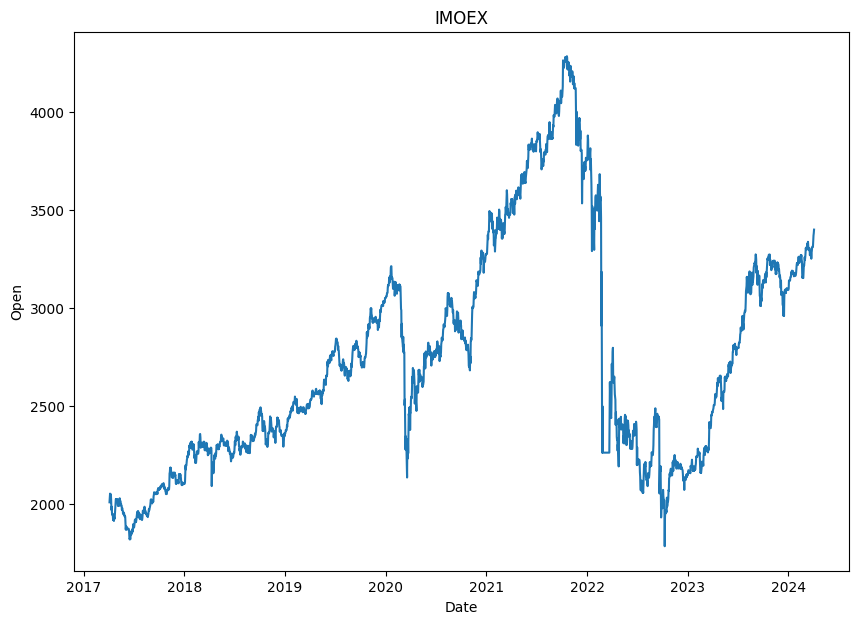

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(df['date'], df['open'])
plt.xlabel('Date')
plt.ylabel('Open')
plt.title('IMOEX')
plt.show()

In [ ]:
df = df.set_index('date')

In [ ]:
df

,open
date,
2017-04-04,2007.900
2017-04-05,2028.710
2017-04-06,2052.050
2017-04-07,2046.780
2017-04-08,2049.415
...,...
2024-03-31,3313.170
2024-04-01,3343.660
2024-04-02,3369.320


In [ ]:
train = df[:round(df.size*0.75)]
test = df[round(df.size*0.75):]

In [ ]:
test_size = test.size

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as mape

In [ ]:
marks = []

In [ ]:
seasonal_periods_range = [360,361,362,363,364,365]
trend_range = ['add', 'mul', None]
seasonal_range = ['add', 'mul', None]
for p in seasonal_periods_range:
  for t in trend_range:
    for s in seasonal_range:
      fitted_model = ExponentialSmoothing(train['open'],trend=t,seasonal=s,seasonal_periods=p).fit()
      test_predictions = fitted_model.forecast(test_size).rename('HW Test Forecast')
      print(t,s,p,mape(test, test_predictions))
      marks.append(mape(test, test_predictions))

add add 360 0.4077178754262402


KeyboardInterrupt: 

In [ ]:
fitted_model = ExponentialSmoothing(train.open,trend='add',seasonal='mul',seasonal_periods=362).fit()



Text(0.5, 1.0, 'IMOEX using Holt Winters')

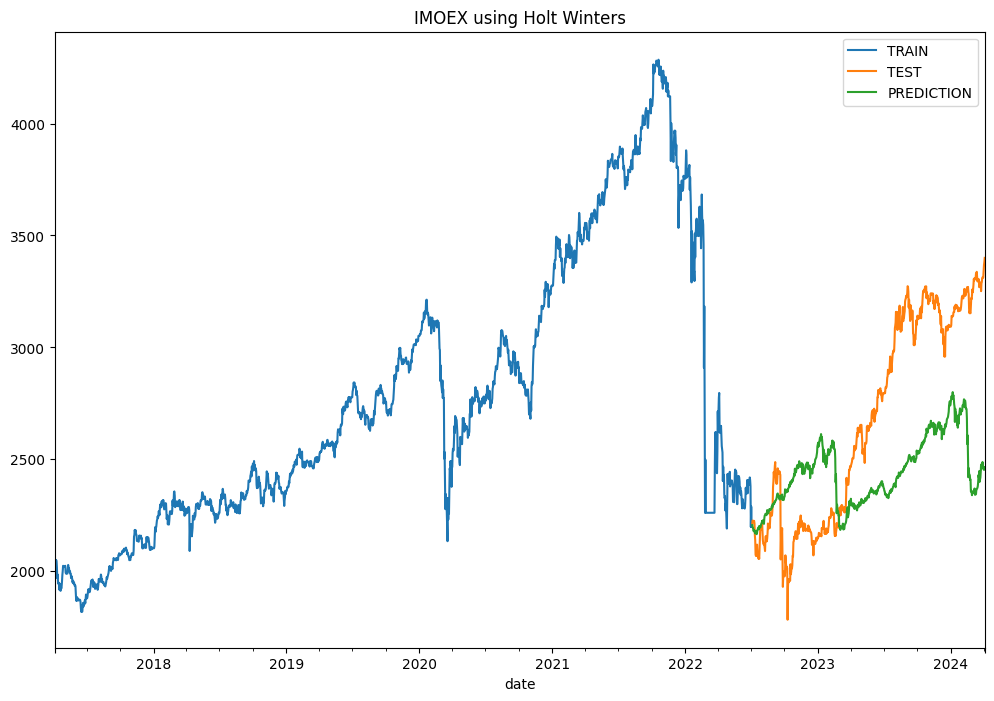

In [ ]:
test_predictions = fitted_model.forecast(test_size).rename('HW Test Forecast')
train['open'].plot(legend=True,label='TRAIN')
test['open'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('IMOEX using Holt Winters')

In [ ]:
test_predictions = fitted_model.forecast(test_size).rename('HW Test Forecast')

In [ ]:
test_predictions[:10]

2023-04-05    2486.065383
2023-04-06    2467.753673
2023-04-07    2467.050814
2023-04-08    2477.637516
2023-04-09    2454.771475
2023-04-10    2474.827522
2023-04-11    2458.932334
2023-04-12    2429.020315
2023-04-13    2450.665177
2023-04-14    2462.068599
Freq: D, Name: HW Test Forecast, dtype: float64

In [ ]:
mape(test, test_predictions)

0.043955027253321545

## SPBIRUS

In [ ]:
df = pd.read_csv('researches/data/SPBIRUS2_df_clearn.csv')
df

,DATE,OPEN
0,2015-11-25,70.62
1,2015-11-26,70.55
2,2015-11-27,69.99
3,2015-11-30,69.80
4,2015-12-01,69.54
...,...,...
2105,2024-04-01,115.45
2106,2024-04-02,115.72
2107,2024-04-03,116.59
2108,2024-04-04,116.50


In [ ]:
df = df[df.DATE<='2024-04-04']

In [ ]:
df

,DATE,OPEN
0,2015-11-25,70.62
1,2015-11-26,70.55
2,2015-11-27,69.99
3,2015-11-30,69.80
4,2015-12-01,69.54
...,...,...
2104,2024-03-29,115.09
2105,2024-04-01,115.45
2106,2024-04-02,115.72
2107,2024-04-03,116.59


In [ ]:
df = df.rename(columns=lambda x: x.lower())

date_range = pd.date_range(start=df.date[0], end=df.date[df.date.size-1], freq='D')
df_full_dates = pd.DataFrame(date_range, columns=['date'])

df['date'] = pd.to_datetime(df['date'])
df = pd.merge(df_full_dates, df, how='left', on='date')

In [ ]:
df.isna().sum()

date      0
open    945
dtype: int64

In [ ]:
df.open = df.open.fillna(df.open.rolling(window = 3,min_periods = 1).mean())

In [ ]:
df.isna().sum()

date     0
open    52
dtype: int64

In [ ]:
df.open = df.open.ffill()

In [ ]:
df = df[df.date<='2024-04-04']

In [ ]:
df.isna().sum()

date    0
open    0
dtype: int64

In [ ]:
df

,date,open
0,2015-11-25,70.62
1,2015-11-26,70.55
2,2015-11-27,69.99
3,2015-11-28,70.27
4,2015-11-29,69.99
...,...,...
3049,2024-03-31,115.09
3050,2024-04-01,115.45
3051,2024-04-02,115.72
3052,2024-04-03,116.59


In [ ]:
df = df[df.date>='2021-04-04']

In [ ]:
df = df.set_index('date')

In [ ]:
df

,open
date,
2021-04-04,110.07
2021-04-05,109.38
2021-04-06,108.71
2021-04-07,108.75
2021-04-08,108.89
...,...
2024-03-31,115.09
2024-04-01,115.45
2024-04-02,115.72


In [ ]:
train = df[:round(df.size*0.75)]
test = df[round(df.size*0.75):]

In [ ]:
test_size = test.size

In [ ]:
marks = []

In [ ]:
seasonal_periods_range = [360,361,362,363,364,365]
trend_range = ['add', 'mul', None]
seasonal_range = ['add', 'mul', None]
for p in seasonal_periods_range:
  for t in trend_range:
    for s in seasonal_range:
      fitted_model = ExponentialSmoothing(train['open'],trend=t,seasonal=s,seasonal_periods=p).fit()
      test_predictions = fitted_model.forecast(test_size).rename('HW Test Forecast')
      print(t,s,p,mape(test, test_predictions))
      marks.append(mape(test, test_predictions))

add add 360 0.030684306998779647
add mul 360 0.06763189804557454
add None 360 0.03438860258387327
mul add 360 0.04549452840690936
mul mul 360 0.06486838892998281
mul None 360 0.03558505759281148
None add 360 0.044518502016024836
None mul 360 0.05731752497197254
None None 360 0.037804019928142425
add add 361 0.023382610338350967
add mul 361 0.06955327016667938
add None 361 0.03438860258387327
mul add 361 0.048321188582784294
mul mul 361 0.04410200417916442
mul None 361 0.03558505759281148
None add 361 0.048462395836833934
None mul 361 0.0608228566180008
None None 361 0.037804019928142425
add add 362 0.03144715393199486
add mul 362 0.07306286412414119
add None 362 0.03438860258387327
mul add 362 0.04226658337007772
mul mul 362 0.05472098152099136
mul None 362 0.03558505759281148
None add 362 0.0438080503464313
None mul 362 0.062249260833696515
None None 362 0.037804019928142425
add add 363 0.02432965117283766
add mul 363 0.04612897953167166
add None 363 0.03438860258387327
mul add 363 0.

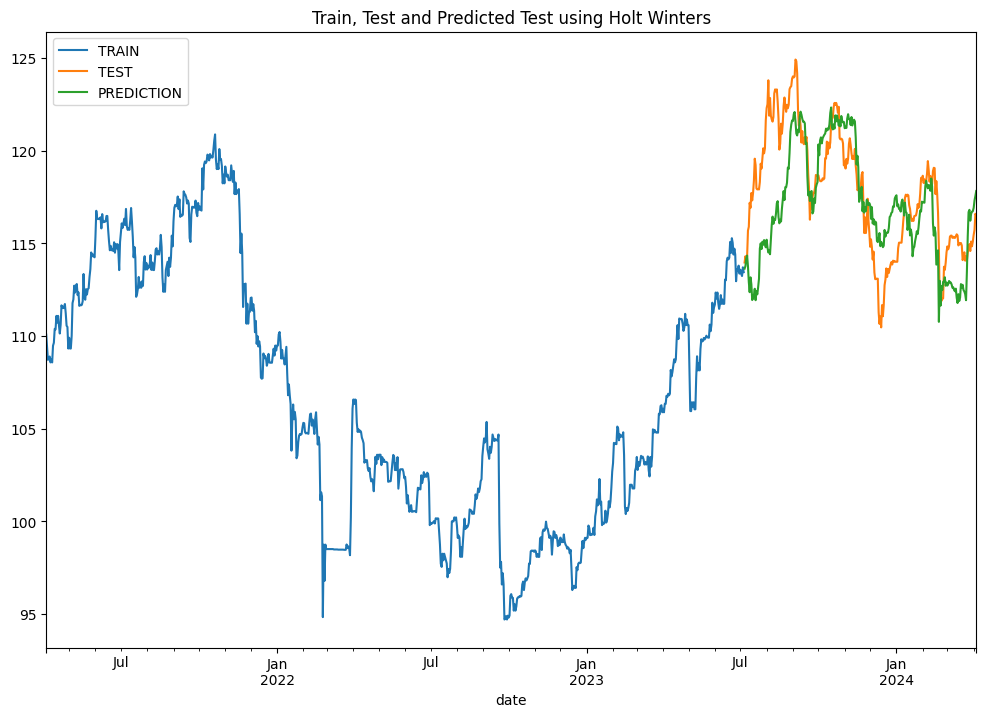

In [ ]:
fitted_model = ExponentialSmoothing(train['open'],trend='mul',seasonal='mul',seasonal_periods=363).fit()
test_predictions = fitted_model.forecast(test_size).rename('HW Test Forecast')
train['open'].plot(legend=True,label='TRAIN')
test['open'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters');

In [ ]:
test_predictions = fitted_model.forecast(test_size).rename('HW Test Forecast')

In [ ]:
mape(test, test_predictions)

0.019547758758428974